# Intro to Quantum Programming - Spring 2025
## Homework 1: Due 02/07/2024

For each exercise below, add as many cells as you want. Don't try to put everything into one cell: that will not create a good presentation score! If there is explanatory text, I want that to be in markdown cells, not in code comments.  The comments in code should just be to help explain the code, not to answer the questions posed by the problem.

To evaluate your submission, we will execute your notebook (**Restart and Run All**) using the _Qiskit 1.3.2_ environment on qbraid. For help with Markdown, see [this link](https://www.markdownguide.org/).

In [95]:
# useful imports -- add more to this cell, or import in your own cells as needed
## Given Libraries
# from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, transpile
# from qiskit.quantum_info import Statevector, Operator 
# from qiskit.visualization import array_to_latex, plot_histogram 
# from qiskit_aer import AerSimulator
# import numpy as np 

## My Libraries
import qiskit as qi
import sv_disc as disc
import numpy as np

from numpy import pi
from qiskit_aer import AerSimulator
from matplotlib import pyplot as plt

from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from IPython.display import display, Math



---

#### Exercise 1.1
From the list of single-qubit operations below, **group together** the operations that are equivalent (up to a global phase).
- X
- Z
- H
- HZH
- HXH
- Ry($\pi$/2)
- Rx($\pi$)Ry($\pi$/2)
- Ry($-\pi$/2)Rx($\pi$)

Demonstrate that the gates in each equivalent group are indeed equivalent. Your demonstration must show that the equivalent transformations have the same effect on *any* input qubit state. Remember that "up to a global phase" means that there is a constant phase $e^{i\delta}$ that can be factored out of both the $|0\rangle$ and $|1\rangle$ coefficients.

Hint: Look at the **unitary matrix** associated with each of the operations. This is the mathematical description of the gate, and it does not depend on the state being operated on.

## Relevant Notes
### Summary: Single-Qubit Gates

| Gate      | Qiskit                          | Description                                    |
|-----------|---------------------------------|------------------------------------------------|
|           | `qc = QuantumCircuit(nq, nc)`  |                                                |
| **Basic Gates** |                          |                                                |
| X         | `qc.x(i)`                       | Pauli-X gate (bit-flip operation)              |
| Z         | `qc.z(i)`                       | Pauli-Z gate (phase-flip operation)            |
| Hadamard  | `qc.h(i)`                       | Hadamard gate (creates superposition)          |
| **Phase Gates** |                           |                                                |
| S         | `qc.s(i)`                       | S gate (π/2 phase rotation)                    |
| T         | `qc.t(i)`                       | T gate (π/4 phase rotation)                    |
| **Rotational Gates** |                      |                                                |
| Phase, RZ | `qc.rz(rad, i)`, `qc.p(rad, i)` | Arbitrary phase rotation                       |
| RX        | `qc.rx(rad, i)`                 | Rotation around the X-axis                     |
| RY        | `qc.ry(rad, i)`                 | Rotation around the Y-axis                     |
| **Measurement** |                            |                                                |
| Measure   | `qc.measure(i, c)`              | Measures the qubit                             |

---

### Summary: Two-Qubit Gates

| Gate      | Qiskit                          | Description                                     |
|-----------|---------------------------------|-------------------------------------------------|
| CNOT      | `qc.cx(ctrl, tgt)`              | Controlled NOT gate (flips target if control is 1) |
| CZ        | `qc.cz(ctrl, tgt)`              | Controlled Z gate (applies phase flip if control is 1) |
| CPhase    | `qc.cp(theta, ctrl, tgt)`       | Controlled phase rotation                        |
| CH        | `qc.ch(ctrl, tgt)`              | Controlled Hadamard gate                         |
| Swap      | `qc.swap(a, b)`                 | Swaps the state of two qubits                    |

### Quirk Simulator used to verify answers:  
[Quirk Simulator Link](https://algassert.com/quirk#circuit=%7B%22cols%22:%5B%5B%22X%22,%22Z%22,%22H%22,%22H%22,%22H%22,%22H%22,%22Y%5E%C2%BD%22,%22X%5E%C2%BD%22,%22Y%22,%22Y%5E-%C2%BD%22%5D,%5B1,1,1,%22Z%22,%22Z%22,%22X%22,1,%22X%5E%C2%BD%22,%22Y%5E%C2%BD%22,%22X%5E%C2%BD%22%5D,%5B1,1,1,%22X%22,%22H%22,%22H%22,1,%22Y%5E%C2%BD%22,%22X%22,%22X%5E%C2%BD%22%5D%5D%7D)
 
I used this simulator to check my answers. I wanted to make sure I had implemented the gates correctly and in the correct order. 

### Radians to Degrees Table
| Radians  | Degrees |
|----------|---------|
| 0        | 0°      |
| π/6      | 30°     |
| π/4      | 45°     |
| π/3      | 60°     |
| π/2      | 90°     |
| 2π/3     | 120°    |
| 3π/4     | 135°    |
| 5π/6     | 150°    |
| π        | 180°    |
| 7π/6     | 210°    |
| 5π/4     | 225°    |
| 4π/3     | 240°    |
| 3π/2     | 270°    |
| 5π/3     | 300°    |
| 7π/4     | 315°    |
| 11π/6    | 330°    |
| 2π       | 360°    |


X Circuit


<IPython.core.display.Latex object>

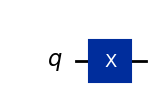

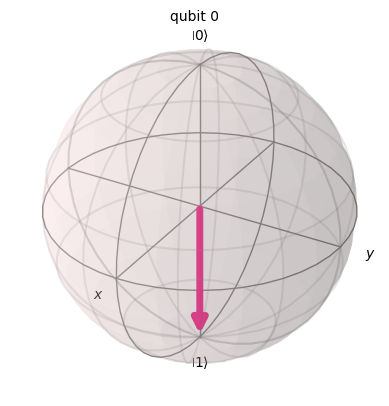

Z Circuit


<IPython.core.display.Latex object>

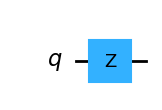

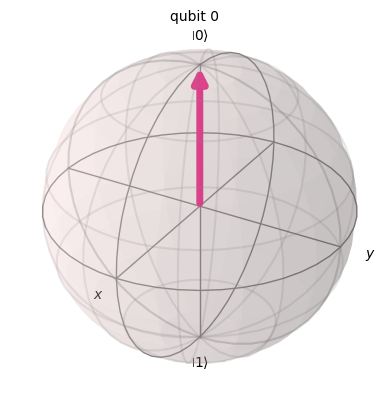

H Circuit


<IPython.core.display.Latex object>

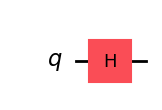

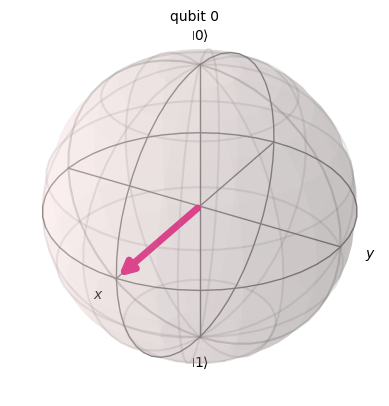

H_Z_X Circuit


<IPython.core.display.Latex object>

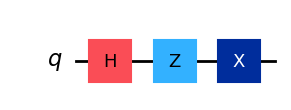

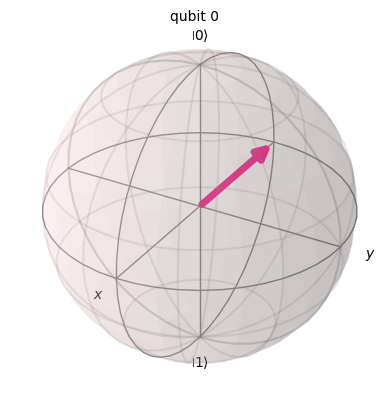

H_Z_H Circuit


<IPython.core.display.Latex object>

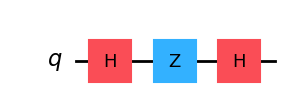

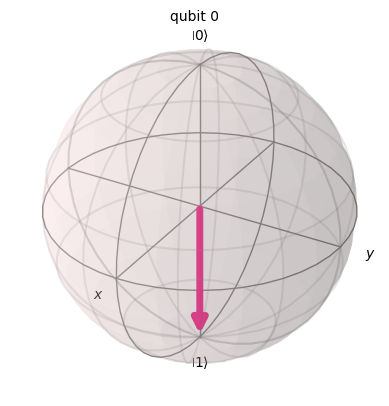

H_X_H Circuit


<IPython.core.display.Latex object>

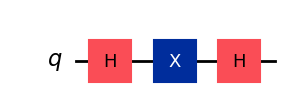

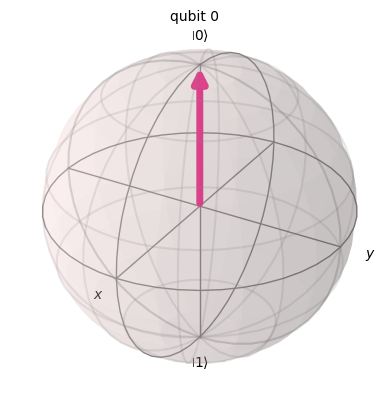

Ry90 Circuit


<IPython.core.display.Latex object>

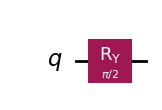

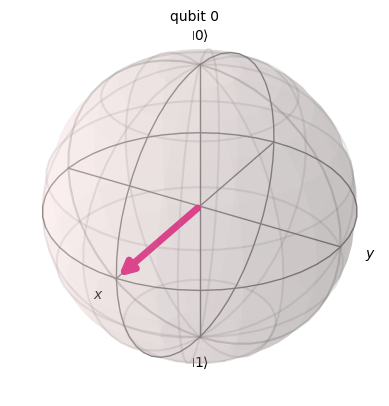

Rx180_Ry90 Circuit


<IPython.core.display.Latex object>

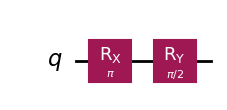

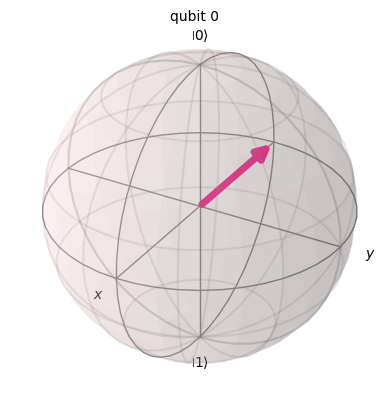

Ry270_Rx180 Circuit


<IPython.core.display.Latex object>

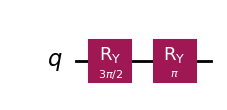

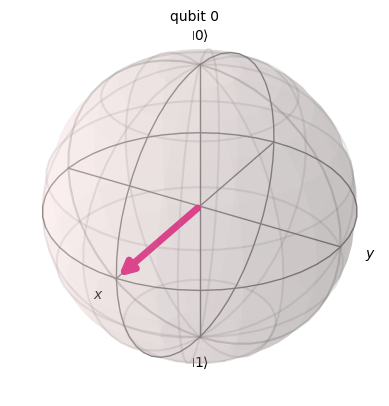

RyNEG90_Rx180 Circuit


<IPython.core.display.Latex object>

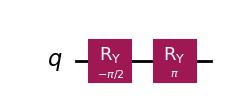

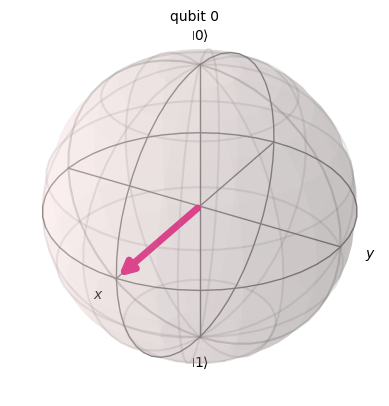


Group 1: 2 circuits
- X
- H_Z_H

Group 2: 2 circuits
- Z
- H_X_H

Group 3: 4 circuits
- H
- Ry90
- Ry270_Rx180
- RyNEG90_Rx180

Group 4: 2 circuits
- H_Z_X
- Rx180_Ry90


In [96]:
## Create Quantum CircuitS
# Create object to allow for looping through all circuits
ckt = {
    # Create Quantum CircuitS with 1 Qubit
    "X": qi.QuantumCircuit(1),
    "Z": qi.QuantumCircuit(1),
    "H": qi.QuantumCircuit(1),

    "H_Z_X": qi.QuantumCircuit(1),
    "H_Z_H": qi.QuantumCircuit(1),
    "H_X_H": qi.QuantumCircuit(1),

    "Ry90": qi.QuantumCircuit(1),
    "Rx180_Ry90": qi.QuantumCircuit(1),
    "Ry270_Rx180": qi.QuantumCircuit(1),
    "RyNEG90_Rx180": qi.QuantumCircuit(1)
}


## Apply Gates to Circuits
ckt["X"].x(0) # Apply X Gate
ckt["Z"].z(0) # Apply Z Gate
ckt["H"].h(0) # Apply Hadamard Gate

# Test Circuit H_Z_X
ckt["H_Z_X"].h(0)
ckt["H_Z_X"].z(0)
ckt["H_Z_X"].x(0)

# H_Z_H
ckt["H_Z_H"].h(0)
ckt["H_Z_H"].z(0)
ckt["H_Z_H"].h(0)

# H_X_H
ckt["H_X_H"].h(0)
ckt["H_X_H"].x(0)
ckt["H_X_H"].h(0)

# Ry90
ckt["Ry90"].ry(pi/2,0)

# Rx180_Ry90
ckt["Rx180_Ry90"].rx(pi,0)
ckt["Rx180_Ry90"].ry(pi/2,0)

# Ry270_Rx180
ckt["Ry270_Rx180"].ry(3*pi/2,0)
ckt["Ry270_Rx180"].ry(pi,0)

# RyNEG90_Rx180
ckt["RyNEG90_Rx180"].ry(-pi/2,0)
ckt["RyNEG90_Rx180"].ry(pi,0)
# Statevector(ckt["Rx180_Ry90"])

## Print Circuits
for name, circuit in ckt.items():
    state = Statevector(circuit)
    print(f"{name} Circuit")
    display(state.draw('latex'))
    display(circuit.draw('mpl'))
    display(state.draw('bloch', reverse_bits=True))


# Grouping Circuits by Equivalent States
groupList = []  # List of groups where each group contains (state, circuit names)
group_counter = 1  # Used to name groups

# Loop through all circuits
for name, circuit in ckt.items():
    state = Statevector.from_instruction(circuit)  # Get the statevector for the circuit
    
    # Check if this statevector has already been encountered in a group
    matched_group = None
    for group in groupList:
        # Compare the current statevector with the first statevector in each group (up to global phase)
        if state.equiv(group[0]):  
            matched_group = group
            break
    
    # If no match was found, create a new group
    if matched_group is None:
        groupList.append((state, [name]))  # Store (statevector, list of circuit names)
        group_counter += 1
    else:
        matched_group[1].append(name)  # Add circuit name to existing group


# ------------------ Display Final Groupings -------------------
for idx, (state, circuits) in enumerate(groupList, 1):
    print(f"\nGroup {idx}: {len(circuits)} circuits")
    for circuit_name in circuits:
        print(f"- {circuit_name}")

---

#### Exercise 1.2
As described in the Lecture 03 slides, the [*swap* gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.SwapGate) transforms $|a\rangle \otimes |b\rangle$ into $|b\rangle \otimes |a\rangle$ for any single-qubit states $|a\rangle$ and $|b\rangle$. That lecture also shows that the swap gate can be implemented using three CNOT gates. Verify that this is true.  Make a *convincing* argument that the CNOT-based implementation is equivalent to a swap gate for *all* states.

### Implementing SWAP Using 3 CNOT Gates
### Overview
The SWAP gate exchanges the states of two qubits:  
$$
|a\rangle \otimes |b\rangle \rightarrow |b\rangle \otimes |a\rangle
$$

This can be implemented using three CNOT (CX) gates:

1. Apply CNOT with qubit 0 as control and qubit 1 as target.
2. Apply CNOT with qubit 1 as control and qubit 0 as target.
3. Apply CNOT with qubit 0 as control and qubit 1 as target.

### Procedure
- **Step 1:** Prepare an initial state
- **Step 2:** Apply the CNOT-based SWAP gate.
- **Step 3:** Compare the statevector before and after the swap operation.
- **Step 4:** Visualize the transformation using Bloch sphere representations.

This verifies that the CNOT-based implementation functions equivalently to a standard SWAP gate.


Original Circuit (State Preparation) for Test Case 1:


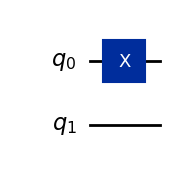

Quantum Circuit implementing SWAP using 3 CNOT gates:


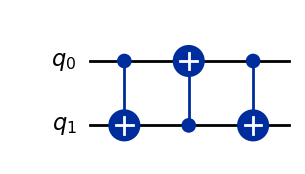

Full Circuit (State Preparation + SWAP using CNOTs) for Test Case 1:


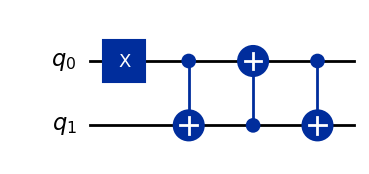

State Before SWAP (Test Case 1):


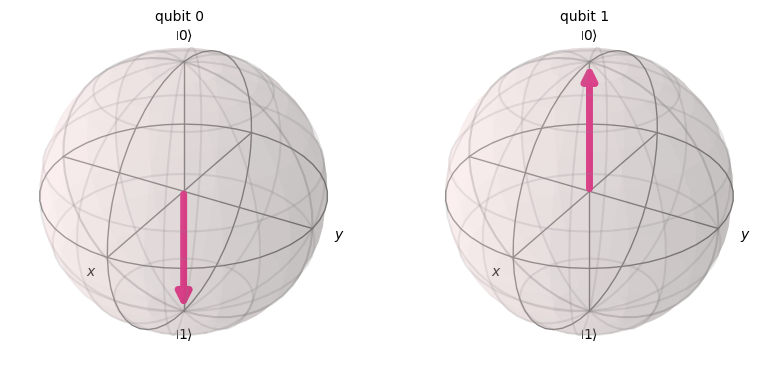

State After SWAP (Test Case 1):


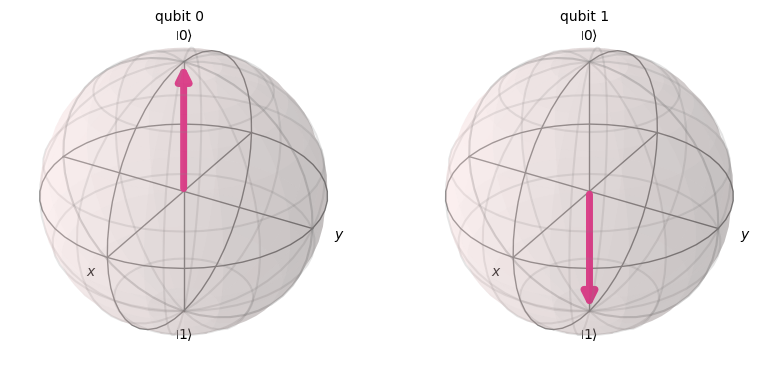

Original Circuit (State Preparation) for Test Case 2:


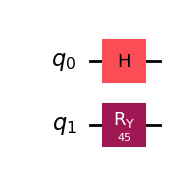

Full Circuit (State Preparation + SWAP using CNOTs) for Test Case 2:


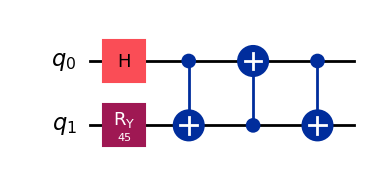

State Before SWAP (Test Case 2):


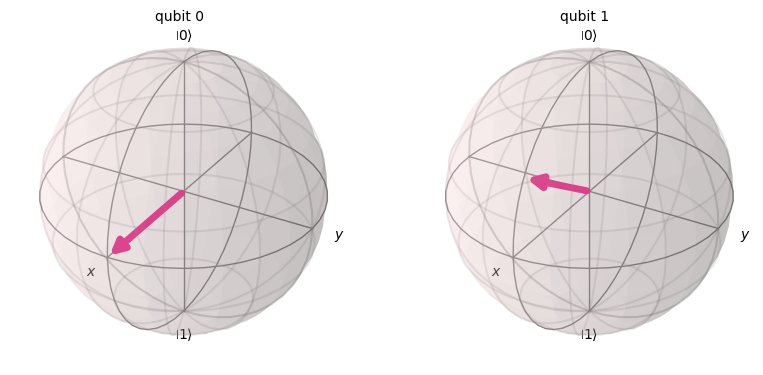

State After SWAP (Test Case 2):


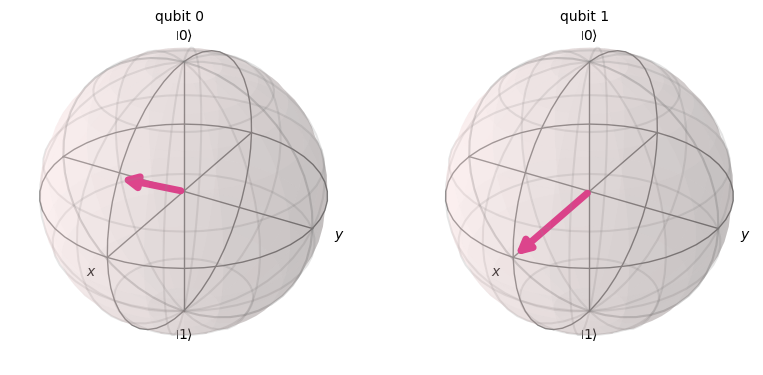

In [97]:
# Define a function to create a SWAP gate using 3 CNOTs
def swap_using_cnot():
    qc = qi.QuantumCircuit(2)
    qc.cx(0, 1)
    qc.cx(1, 0)
    qc.cx(0, 1)
    return qc

# Test Case 1: Qubit 0 in state |1>
qc_original_1 = qi.QuantumCircuit(2)
qc_original_1.x(0)  # Set qubit 0 to |1> to observe the swap effect

# Get the statevector before the SWAP operation for Test Case 1
initial_state_1 = Statevector.from_instruction(qc_original_1)

# Apply SWAP using CNOTs for Test Case 1
qc_swap = swap_using_cnot()
qc_total_1 = qc_original_1.compose(qc_swap)

# Get the statevector after the SWAP operation for Test Case 1
final_state_1 = Statevector.from_instruction(qc_total_1)

# Test Case 2: Qubit 0 in superposition and Qubit 1 rotated by 45 degrees
qc_original_2 = qi.QuantumCircuit(2)
qc_original_2.h(0)  # Create a superposition on qubit 0
qc_original_2.ry(45, 1)  # Rotate qubit 1 by 45 degrees around the Y-axis

# Get the statevector before the SWAP operation for Test Case 2
initial_state_2 = Statevector.from_instruction(qc_original_2)

# Apply SWAP using CNOTs for Test Case 2
qc_total_2 = qc_original_2.compose(qc_swap)

# Get the statevector after the SWAP operation for Test Case 2
final_state_2 = Statevector.from_instruction(qc_total_2)

# Display the circuits and Bloch sphere visualizations for both test cases
print("Original Circuit (State Preparation) for Test Case 1:")
display(qc_original_1.draw('mpl'))

print("Quantum Circuit implementing SWAP using 3 CNOT gates:")
display(qc_swap.draw('mpl'))

print("Full Circuit (State Preparation + SWAP using CNOTs) for Test Case 1:")
display(qc_total_1.draw('mpl'))

# Plot Bloch sphere for Test Case 1
print("State Before SWAP (Test Case 1):")
bloch_before_1 = plot_bloch_multivector(initial_state_1)
display(bloch_before_1)

print("State After SWAP (Test Case 1):")
bloch_after_1 = plot_bloch_multivector(final_state_1)
display(bloch_after_1)

# Display for Test Case 2
print("Original Circuit (State Preparation) for Test Case 2:")
display(qc_original_2.draw('mpl'))

print("Full Circuit (State Preparation + SWAP using CNOTs) for Test Case 2:")
display(qc_total_2.draw('mpl'))

# Plot Bloch sphere for Test Case 2
print("State Before SWAP (Test Case 2):")
bloch_before_2 = plot_bloch_multivector(initial_state_2)
display(bloch_before_2)

print("State After SWAP (Test Case 2):")
bloch_after_2 = plot_bloch_multivector(final_state_2)
display(bloch_after_2)


---

#### Exercise 1.3
Create a quantum circuit that rotates a three-qubit state to the left by position. It sends $|abc\rangle$ to $|bca\rangle$. Show a drawing of the circuit (using `mpl`) and demonstrate that it works. You may only use the following gates: X, Y, Z, H, CNOT, CZ, SWAP.

### Rotating a Three-Qubit State to the Left

#### Problem Description:
We need to create a quantum circuit that rotates a three-qubit state to the left by one position. Specifically, it transforms the state $|abc\rangle$ into $|bca\rangle$. The allowed gates to be used are: X, Y, Z, H, CNOT, CZ, and SWAP.

#### Approach:
1. **Initial State**: The starting state is a three-qubit system $|abc\rangle$, where qubits $a$, $b$, and $c$ are the individual bits.
2. **Required Transformation**: We need to move the qubits as follows:
   - The first qubit (position 0) should become the second qubit (position 1).
   - The second qubit (position 1) should become the third qubit (position 2).
   - The third qubit (position 2) should become the first qubit (position 0).
   
3. **Gate Usage**: Since we are only allowed to use specific gates (X, Y, Z, H, CNOT, CZ, SWAP), the most straightforward approach is to use **SWAP gates** to swap qubits as needed.

4. **Circuit Implementation**: We will use two SWAP gates to achieve the desired result:
   - First, swap qubits 0 and 1.
   - Then, swap qubits 1 and 2.

5. **Verification**: The correctness of the solution will be verified by preparing an example state, applying the rotation, and checking the final state.


Original Circuit (State Preparation):


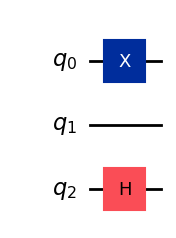

Quantum Circuit implementing rotation using SWAP gates:


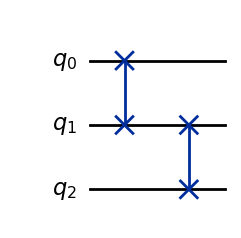

Full Circuit (State Preparation + Rotation using SWAP gates):


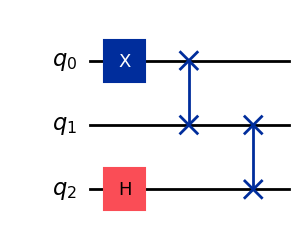

State Before Rotation:


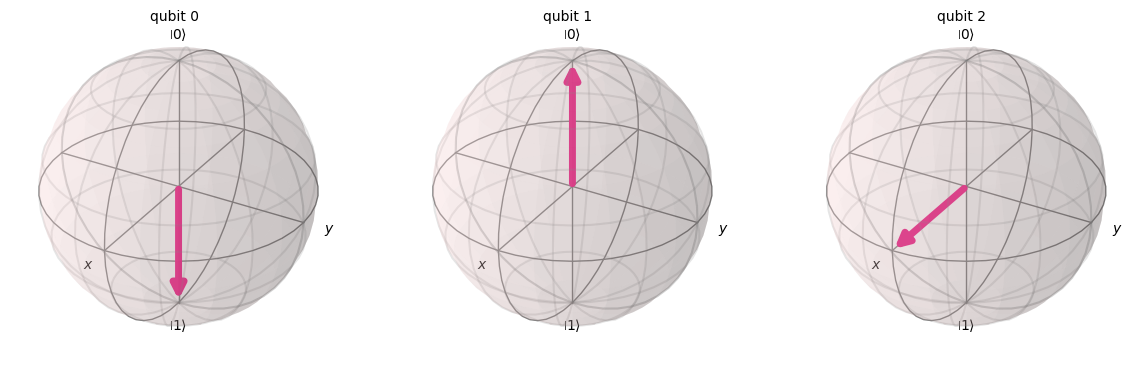

State After Rotation:


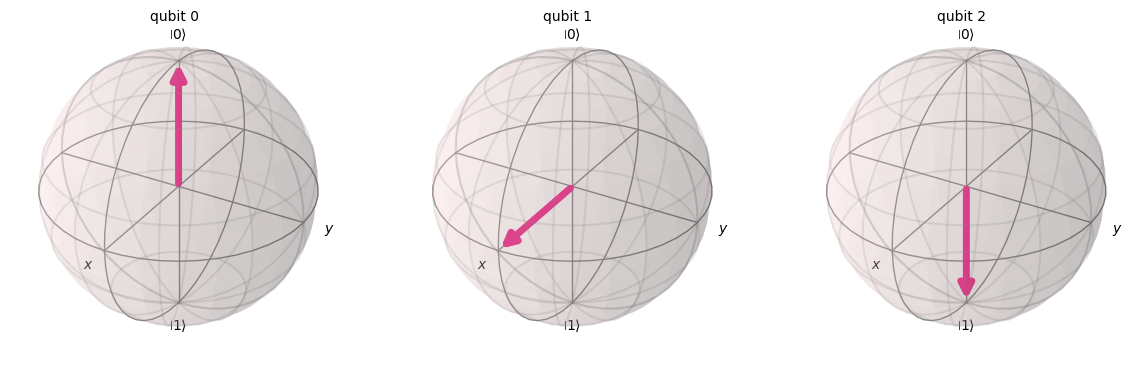

In [98]:
# Define the quantum circuit that rotates a three-qubit state to the left
def rotate_left_three_qubits():
    qc = qi.QuantumCircuit(3)
    
    # Apply SWAP gates to rotate the qubits left
    qc.swap(0, 1)  # Swap qubit 0 and qubit 1
    qc.swap(1, 2)  # Swap qubit 1 and qubit 2
    
    return qc

# Create a quantum circuit with an example state (e.g., |101>)
qc_original = qi.QuantumCircuit(3)
qc_original.x(0)  # Set qubit 0 to |1>
qc_original.h(2)  # Set qubit 2 to (1/sqrt(2)) * (|0> + |1>)

# Get the statevector before the rotation
initial_state = Statevector.from_instruction(qc_original)

# Apply the rotation to the left
qc_rotate = rotate_left_three_qubits()
qc_total = qc_original.compose(qc_rotate)

# Get the statevector after the rotation
final_state = Statevector.from_instruction(qc_total)

# Display the circuit
print("Original Circuit (State Preparation):")
display(qc_original.draw('mpl'))

print("Quantum Circuit implementing rotation using SWAP gates:")
display(qc_rotate.draw('mpl'))

print("Full Circuit (State Preparation + Rotation using SWAP gates):")
display(qc_total.draw('mpl'))

# Generate the Bloch sphere visualization separately
# Plot Bloch sphere before rotation
print("State Before Rotation:")
bloch_before = plot_bloch_multivector(initial_state)
display(bloch_before)

# Plot Bloch sphere after rotation
print("State After Rotation:")
bloch_after = plot_bloch_multivector(final_state)
display(bloch_after)

---

### Exercise 1.4
Define a Python function that takes a string parameter and returns a quantum circuit that prepares the desired state. The string is in the format used in `Statevector.from_label()`: each character in the string represents the state of a qubit and must be '0', '1', '+', '-', 'r', or 'l'.  (Any other characters in the string must be ignored.) The circuit returned from the function must take an input state of all zero to the desired state. The number of qubits is determined by the length of the string.  (To be more precise, it will depend on the number of valid characters in the string, since invalid characters must be ignored.)

Demonstrate your function by *drawing* a selection of circuits that result from a variety of input strings, and confirm that the circuit creates the desired state in every test case.  The test cases must collectively exercise all of the string characters and must include different numbers of qubits.

### Quantum Circuit State Preparation

### Problem Description:
We need to define a Python function that constructs a quantum circuit capable of preparing a desired quantum state based on a string input. The string represents the state of each qubit, with each character in the string corresponding to a qubit's state. The valid characters in the string are:
- `'0'`: the qubit is in state \( |0\rangle \)
- `'1'`: the qubit is in state \( |1\rangle \)
- `'+'`: the qubit is in state \( \frac{|0\rangle + |1\rangle}{\sqrt{2}} \)
- `'-'`: the qubit is in state \( \frac{|0\rangle - |1\rangle}{\sqrt{2}} \)
- `'r'`: a qubit is rotated by 45 degrees to the right (clockwise) on the Bloch sphere
- `'l'`: a qubit is rotated by 45 degrees to the left (counterclockwise) on the Bloch sphere

### Approach:
1. **Input String**: The string is parsed such that each character represents the state of a qubit. Only valid characters ('0', '1', '+', '-', 'r', 'l') are considered, and the length of the string dictates the number of qubits in the quantum circuit.
2. **Circuit Construction**: 
   - Initialize the quantum circuit in the \( |0\rangle \) state.
   - Apply the necessary gates to prepare the desired state based on the characters in the string:
     - For '0' and '1', apply the appropriate X-gates.
     - For '+' and '-', apply the H-gate followed by a phase flip for '-'.
     - For 'r' and 'l', apply the appropriate rotation around the Bloch sphere.
3. **Output**: Return a quantum circuit that starts in the \( |0\rangle \) state and transforms into the desired quantum state.
4. **Verification**: Demonstrate the function with various test cases, drawing the circuits and confirming that the resulting state matches the expected quantum state.

### Test Cases:
1. **Single-Qubit Test**: Test for states such as '0', '1', '+', '-', 'r', 'l'.
2. **Multi-Qubit Test**: Test with strings like '01', '++', 'rl', and others, covering different numbers of qubits and combinations of states.


Quantum Circuit for state '0':


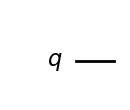

Quantum Circuit for state '1':


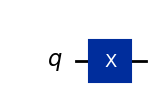

Quantum Circuit for state '+':


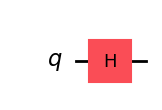

Quantum Circuit for state '-':


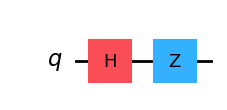

Quantum Circuit for state 'r':


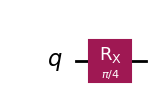

Quantum Circuit for state 'l':


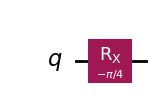

Quantum Circuit for state '01':


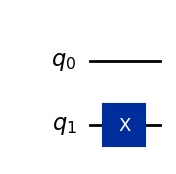

Quantum Circuit for state '++':


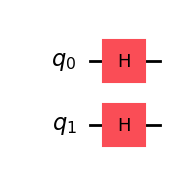

Quantum Circuit for state 'rl':


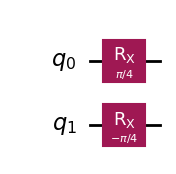

In [99]:
def prepare_state_from_string(state_string):
    # Filter the string to keep only valid characters
    valid_characters = '01+-rl'
    state_string = ''.join([ch for ch in state_string if ch in valid_characters])
    
    # Create a quantum circuit with the number of qubits equal to the length of the valid state string
    num_qubits = len(state_string)
    qc = qi.QuantumCircuit(num_qubits)
    
    # Apply gates based on the characters in the state string
    for i, ch in enumerate(state_string):
        if ch == '1':
            qc.x(i)
        elif ch == '+':
            qc.h(i)
        elif ch == '-':
            qc.h(i)
            qc.z(i)
        elif ch == 'r':
            qc.rx(pi/4, i)  # 45-degree rotation clockwise (right)
        elif ch == 'l':
            qc.rx(-pi/4, i)  # 45-degree rotation counterclockwise (left)
        # '0' doesn't require any action, as the qubit is already in |0> state
    
    return qc

# Test cases with various strings to demonstrate the function
test_cases = [
    '0',     # Single qubit, state |0>
    '1',     # Single qubit, state |1>
    '+',     # Single qubit, state (|0> + |1>)/sqrt(2)
    '-',     # Single qubit, state (|0> - |1>)/sqrt(2)
    'r',     # Single qubit, rotated 45 degrees clockwise
    'l',     # Single qubit, rotated 45 degrees counterclockwise
    '01',    # Two qubits, state |01>
    '++',    # Two qubits, state (|0> + |1>)/sqrt(2) for each qubit
    'rl',    # Two qubits, rotated 45 degrees clockwise and counterclockwise
]

# Iterate over the test cases, draw the circuit and verify the state
for state_str in test_cases:
    qc = prepare_state_from_string(state_str)
    print(f"Quantum Circuit for state '{state_str}':")
    display(qc.draw('mpl'))


---

### Exercise 1.5
Define a Python function that takes a string parameter (as described in 1.4) and does the following: (1) prepares the specified state, and (2) swaps the state of each even-indexed qubit with its next-highest neighbor. Qubit 0 will be swapped with qubit 1, qubit 2 will be swapped with qubit 3, and so forth.  If the number of qubits is odd, then the most significant qubit must be unchanged.

For full credit, use the function from 1.4 to perform the state preparation action.

Demonstrate your function by *drawing* a selection of circuits that result from a variety of input strings, and confirm that the circuit creates the desired state in every test case.  The test cases must collectively exercise all of the string characters and must include different numbers of qubits. 

### Quantum Circuit State Preparation and Swap
### Problem Description:
We need to define a Python function that:
1. Takes a string input representing a desired quantum state.
2. Prepares the quantum state as described in Exercise 1.4.
3. Swaps the state of each even-indexed qubit with its next-highest neighbor. For example, qubit 0 will be swapped with qubit 1, qubit 2 with qubit 3, and so on. If the number of qubits is odd, the most significant qubit remains unchanged.

The input string has the same format as in Exercise 1.4, and the function should utilize the function from Exercise 1.4 to prepare the state before performing the swaps.

### Approach:
1. **State Preparation**: Use the function from Exercise 1.4 to prepare the desired state.
2. **Swap Operation**: After preparing the state, swap the states of each even-indexed qubit with its next-highest neighbor. This can be done using **SWAP gates** for each pair of neighboring qubits (i.e., 0 with 1, 2 with 3, etc.). If the number of qubits is odd, the last qubit remains unchanged.
3. **Output**: Return the quantum circuit with both the state preparation and the swap operations applied.
4. **Verification**: Demonstrate the function with various test cases, drawing the circuits and confirming that the resulting state matches the expected quantum state after the swaps.

### Test Cases:
1. **Single-Qubit Test**: States like '0', '1', '+', '-', 'r', and 'l'.
2. **Even Number of Qubits Test**: Strings like '01', '++', 'rl'.
3. **Odd Number of Qubits Test**: Strings like '010', '++-', 'rll'.



Test case: Single qubit in state |0>


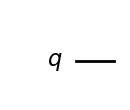

<IPython.core.display.Math object>


Test case: Single qubit in state |1>


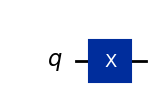

<IPython.core.display.Math object>


Test case: Single qubit in state |+>


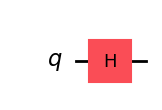

<IPython.core.display.Math object>


Test case: Single qubit in state |->


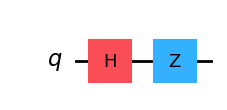

<IPython.core.display.Math object>


Test case: Two qubits in state |01>


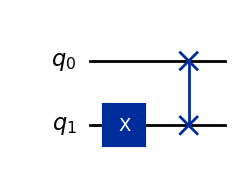

<IPython.core.display.Math object>


Test case: Two qubits in state |r> and |l>


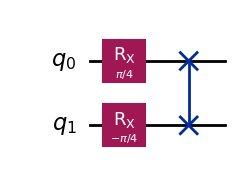

<IPython.core.display.Math object>


Test case: Three qubits in state |010>


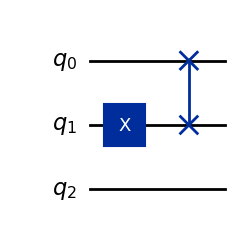

<IPython.core.display.Math object>


Test case: Three qubits in state |++->


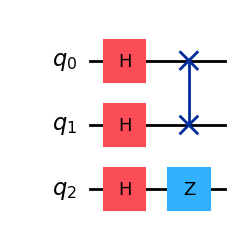

<IPython.core.display.Math object>

In [100]:
# Fron 1.4 Solution
def prepare_state_from_string(state_string):
    n_qubits = len(state_string)
    qc = qi.QuantumCircuit(n_qubits)

    for i, char in enumerate(state_string):
        if char == '1':
            qc.x(i)
        elif char == '+':
            qc.h(i)
        elif char == '-':
            qc.h(i)
            qc.z(i)
        elif char == 'r':
            qc.rx(pi/4, i)  # 45 degree right rotation (clockwise)
        elif char == 'l':
            qc.rx(-pi/4, i)  # 45 degree left rotation (counterclockwise)

    return qc

# Define the function that prepares the state and swaps even-indexed qubits
def prepare_and_swap(state_string):
    # Step 1: Prepare the state using the function from Exercise 1.4
    qc = prepare_state_from_string(state_string)

    # Step 2: Apply SWAP gates for each pair of neighboring even-indexed qubits
    n_qubits = len(state_string)
    for i in range(0, n_qubits - 1, 2):  # Loop through even-indexed qubits
        qc.swap(i, i + 1)

    return qc

# Function to convert statevector to LaTeX string
def statevector_to_latex(statevector):
    latex_str = r"\left| \psi \right\rangle = " + " + ".join([f"{amp:.2f}|{bin(i)[2:].zfill(statevector.num_qubits)}>" for i, amp in enumerate(statevector.data) if np.abs(amp) > 1e-6])
    return latex_str

# Example test cases
test_cases = [
    ('0', 'Single qubit in state |0>'),
    ('1', 'Single qubit in state |1>'),
    ('+', 'Single qubit in state |+>'),
    ('-', 'Single qubit in state |->'),
    ('01', 'Two qubits in state |01>'),
    ('rl', 'Two qubits in state |r> and |l>'),
    ('010', 'Three qubits in state |010>'),
    ('++-', 'Three qubits in state |++->'),
]

# Generate and draw circuits for each test case
for state_string, description in test_cases:
    print(f"\nTest case: {description}")
    qc_result = prepare_and_swap(state_string)
    display(qc_result.draw('mpl'))

    # Compute and display the statevector in LaTeX format
    initial_state = Statevector.from_instruction(qc_result)
    latex_str = statevector_to_latex(initial_state)
    display(Math(latex_str))  # Display the statevector as LaTeX
